# **Loan Repayment Prediction - Random Forest**

**Project Purpose:**

To develop a predictive model that assists in evaluating the likelihood of borrowers repaying their loans, thereby enhancing investor confidence and ensuring better risk management.

**Business Case:**

To create a model that accurately predicts loan repayment. Investors require reliable insights into borrower profiles to make informed decisions. Predicting repayment probabilities will improve investor satisfaction, reduce default risks, and drive growth for the platform.

**Goal:**

Build a machine learning model to accurately predict whether a borrower is likely to repay their loan based on their profile and historical data.

**Deliverable:**

A fully functional predictive model with detailed performance metrics, ready for deployment, to classify borrowers based on repayment likelihood.


In [65]:
import pandas as pd
df = pd.read_csv('loan_borrower_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Import Libraries and  Data**

In [66]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [67]:
# Importing the dataset
loans = pd.read_csv('loan_borrower_data.csv')
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Exploratory Data Analysis (EDA)**

Explore variable distributions and interactions. Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.


Text(0.5, 0, 'FICO')

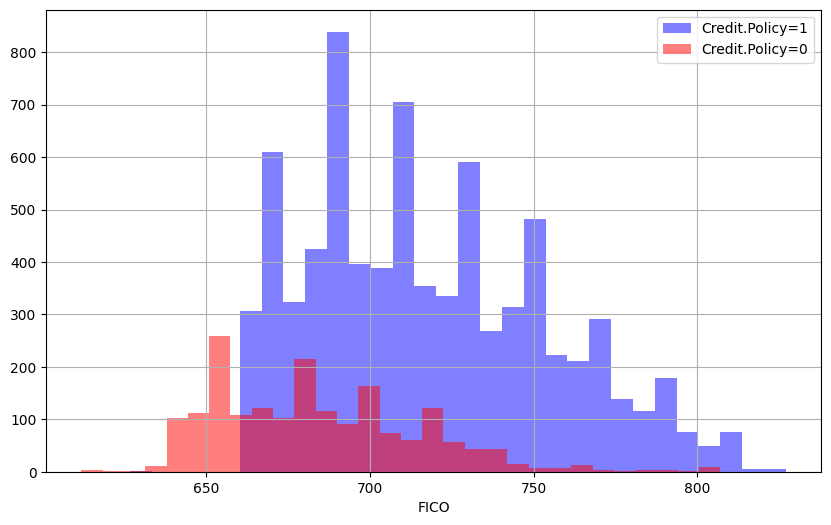

In [68]:
# Creating a histogram
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',  bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Create a similar figure; select the **not.fully.paid** column.

Text(0.5, 0, 'FICO')

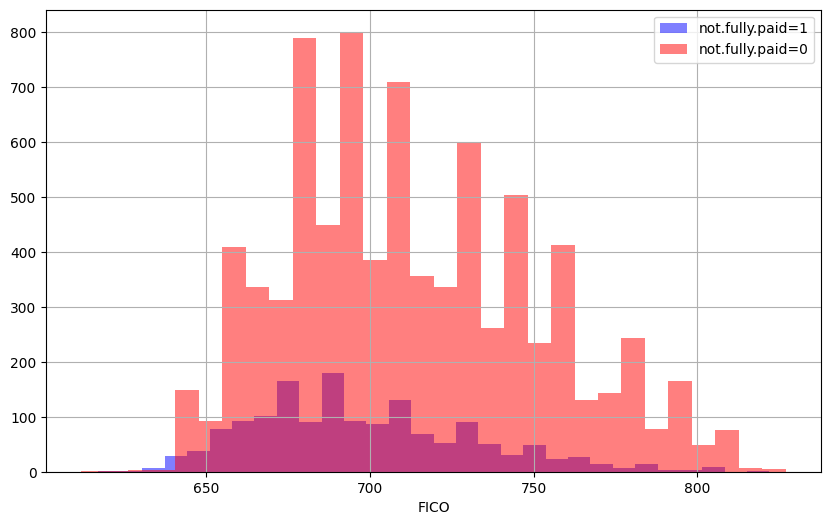

In [69]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Create a countplot using seaborn showing the counts of loans by purpose with the hue defined by **not.fully.paid**.

<Axes: xlabel='purpose', ylabel='count'>

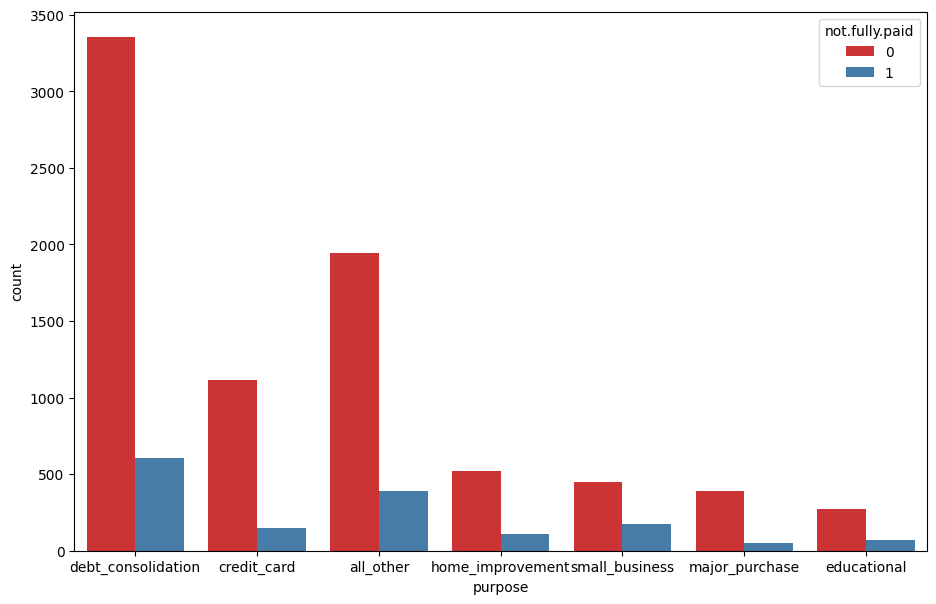

In [70]:
# Creating countplot
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [71]:
loans['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


**Setting up the Data**

In [72]:
### Create a list of elements containing the string purpose. Name this list cat_feats.
cat_feats = ['purpose']

In [73]:
### Create dummy variables to prepare for Random Forest
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

**Class Imbalance:**

The outcome variable is severely imbalanced. it would be best to oversample the minorty class or undersample the majority class.

Some methods include:
- Randomly choosing observations to over/undersample
- SMOTE: synthetically creates new observations based on statistics

In [74]:
y.value_counts()

,count
not.fully.paid,
0,8045
1,1533


In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state=42)
X_res,Y_res = sm.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [76]:
Y_res.value_counts()

,count
not.fully.paid,
0,8045
1,8045


**Train-Test Split**

In [77]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

#split dataset into train (75%) and test (25%), shuffle observations
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_res,Y_res,test_size=0.25,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc_res = RandomForestClassifier(n_estimators=600,max_features=6)
rfc_res.fit(X_train_res,y_train_res)

RandomForestClassifier(max_features=6, n_estimators=600)

In [79]:
predictions_res = rfc_res.predict(X_test_res)

# **Accuracy, Precision, Recall, & F1 Score**

**Accuracy**

= (TP + TN) / (TP + TN + FP + FN) = TruePositives&Negatives / All

What % of values were correctly predicted?

**Precision**

= TP / (TP + FP) = TruePositive / PredictedPositives

What % of predicted positives are actually positive?

**Recall**

= TP / (TP + FN) = TruePositive / ActualPositives

What % of actual positives are predicted positive?

**F1 Score**

= 2 * (Precision * Recall) / (Precision + Recall)

Balances Precision and Recall (weighted average), useful for datasets with class imbalance (observations have a large number of Actual Negatives), take false positives and negatives into account.

In [80]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_res,predictions_res))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2019
           1       0.87      0.83      0.85      2004

    accuracy                           0.86      4023
   macro avg       0.86      0.86      0.86      4023
weighted avg       0.86      0.86      0.86      4023



# Results and Model Evaluation

From a business perspective, accurately predicting borrowers likely to repay their loans (True Positives) is crucial to reducing default risks and maintaining investor confidence. Therefore, both Precision and Recall are important measures for this model to ensure reliable predictions and minimize errors. Since the model shows consistent performance across metrics and classes, it demonstrates robustness and suitability for deployment without overfitting or sacrificing predictive power.

***Precision:*** Precision on the testing data is 87%, indicating the model effectively minimizes False Positives. This ensures that most predicted borrowers are genuinely good repayment candidates.

***Accuracy:*** Accuracy on the testing data is 86%, meaning the model correctly predicts borrower repayment likelihood for about 6 out of every 7 cases.

***Recall:*** Recall on the testing data is 83%, showing the model successfully identifies the majority of borrowers likely to repay.

***F1 Score:*** The F1 score on the testing data is 85%, reflecting the balance between precision and recall for repayment predictions.


# Symptoms of Overfitting and Underfitting:

***Overfitting:***

Relies too much on the training data. Shows great performance on training data but a drop in performance on testing data.
Need to reduce model complexity and remove layers & features from the model.

***Underfitting:***

A failure to learn relationships in training data, poor performance on training data.
Need to increase model complexity and add layers & features to the model.
This model does not show symptoms of Underfitting or Overfitting.

In [81]:
print(classification_report(y_test_res,predictions_res))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2019
           1       0.87      0.83      0.85      2004

    accuracy                           0.86      4023
   macro avg       0.86      0.86      0.86      4023
weighted avg       0.86      0.86      0.86      4023



# **Confusion Matrix**

Identifies True Positives, True Negatives, False Positives, False Negatives based on Predicted and Actual Values

In [82]:
confusion_matrix = confusion_matrix(y_test_res,predictions_res)
confusion_matrix

array([[1776,  243],
       [ 337, 1667]])

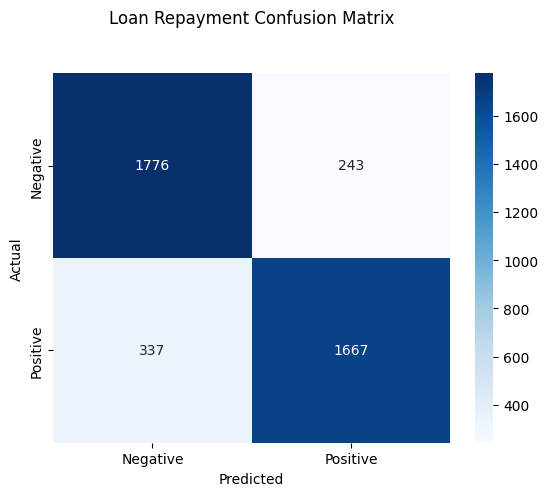

In [83]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt = '')

ax.set_title('Loan Repayment Confusion Matrix\n\n');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()


